# Image Analysis
To start in analysis, we need to import all the needed libraries.

In [1]:
# Import requirement libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import random
import os

from globals import CLASSES_NAME

Next, we need to check the ground truth files.

In [2]:
# Define name of images and their annotation bbox
train_images_path = "dataset\\train-images.csv"
train_bbox_path = "dataset\\train-annotations-bbox.csv"

train_images_df = pd.read_csv(train_images_path, usecols=["ImageID"])
train_bbox_df = pd.read_csv(train_bbox_path, usecols=["ImageID", "LabelName"])

# Print first 5 of dataframe
print(train_images_df.head())
print(train_bbox_df.head())

            ImageID
0  4fa8054781a4c382
1  b37f763ae67d0888
2  7e8584b0f487cb9e
3  86638230febe21c4
4  249086e72671397d
            ImageID  LabelName
0  000002b66c9c498e  /m/01g317
1  000002b66c9c498e  /m/01g317
2  000002b66c9c498e  /m/01g317
3  000002b66c9c498e  /m/01g317
4  000002b66c9c498e  /m/01g317


In [3]:
print(train_images_df.columns)
print(np.size(train_images_df))

Index(['ImageID'], dtype='object')
1743042


In [4]:
# Changing dataframes for comfortable usage
train_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)
# Print changed dataframes
print(train_bbox_df.head())

            ImageID  LabelCode
0  000002b66c9c498e  /m/01g317
1  000002b66c9c498e  /m/01g317
2  000002b66c9c498e  /m/01g317
3  000002b66c9c498e  /m/01g317
4  000002b66c9c498e  /m/01g317


## Loading all needed images from Open Image Dataset
Loading depends on the classes which we need.

In [5]:
class_description_path = "dataset\\class-descriptions.csv"
class_description_df = pd.read_csv(class_description_path)
class_description_df.columns = ["LabelCode", "LabelName"]
class_description_list = class_description_df.loc[class_description_df["LabelName"].isin(CLASSES_NAME), "LabelCode"].tolist()
print(class_description_list)

['/m/015p6', '/m/01dws', '/m/01yrx']


### Downloading images from Dataset
Creating a function for writing to file 10% of image names from the dataset
which depends on the classes name in their description.

In [6]:
def write_data_part_to_file(data_split, classes_name_df, percent_of_data=None):
    """
    Function for creating list of images which will be downloaded and write that to txt file;
    :param data_split: is string value (can be set as 'train', 'test' or 'validation';
    :param classes_name_df: is a data frame with a list of classes codes which need for training in this project;
    :param percent_of_data: is the decimal value of per cent dataset which will be written to txt file;
    :return: written file with a list of images to be downloaded.
    """

    # Initializing files names of ground truth for this part of split
    images_name_path = "dataset\\"+data_split+"-images.csv"
    images_bbox_path = "dataset\\"+data_split+"-annotations-bbox.csv"

    # Defining DataFrame for these files
    images_name_df = pd.read_csv(images_name_path, usecols=["ImageID"])
    images_bbox_df = pd.read_csv(images_bbox_path, usecols=["ImageID", "LabelName"])

    # Changing dataframe name of column for comfortable usage
    images_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)

    # Determining which image we need depends on whether our class is in their description
    images_bbox_df = images_bbox_df.loc[images_bbox_df["LabelCode"].isin(classes_name_df), "ImageID"]
    images_name_df = images_name_df.loc[images_name_df["ImageID"].isin(images_bbox_df.tolist())]
    images_name_df = images_name_df.drop_duplicates()

    # Splitting dataframe to percent of data for downloading not all images
    images_name_list = []
    if percent_of_data is not None:
        images_name_df_index = images_name_df.index.tolist()
        images_name_df_size = np.size(images_name_df_index)
        images_name_df_index = images_name_df_index[:int(images_name_df_size * percent_of_data)]
        images_name_list = images_name_df.loc[images_name_df.index.isin(images_name_df_index), "ImageID"].tolist()

    # Writing list of images names to file
    file_name = "dataset\\images_name_lists\\"+data_split+"_images_list.txt"

    with open(file_name, "w") as file:
        for image_id in images_name_list:
            file.write(f"{data_split}/{image_id}\n")

    print(f"==> {data_split}_list file created! <==")

Using function for creating images name list files for three different splits (train, test, validation).

In [7]:
write_data_part_to_file("train", class_description_df, percent_of_data=0.1)
write_data_part_to_file("test", class_description_df, percent_of_data=0.1)
write_data_part_to_file("validation", class_description_df, percent_of_data=1)

==> train_list file created! <==
==> test_list file created! <==
==> validation_list file created! <==


### Downloading images with the download script from the open image dataset site

In [8]:
!python oid_downloader.py "dataset\\images_name_lists\\train_images_list.txt" --download_folder="dataset\\train" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\test_images_list.txt" --download_folder="dataset\\test" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\validation_images_list.txt" --download_folder="dataset\\validation" --num_processes=5


## Check and preprocess downloaded images from local directory
Making function for viewing a random image

In [9]:
def view_random_image(target_dir):
    # Get a random image path
    random_image_name = random.sample(os.listdir(target_dir), 1)

    # Read the image and plot it
    image = cv2.imread(target_dir + "\\" + random_image_name[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the shape of the image
    print(f"Image shape: {image.shape}")

    plt.imshow(image)
    plt.title(random_image_name[0])
    plt.axis("off")
    plt.show()

    return image, random_image_name[0]

Image shape: (768, 1024, 3)


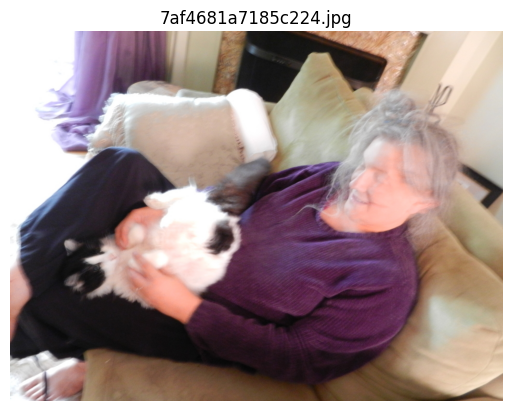

In [10]:
# Visualising image and returning it with image name
rand_image, image_name = view_random_image(target_dir="dataset\\train")

In [11]:
# Viewing image name
image_name.replace('.jpg', '')

'7af4681a7185c224'

In [12]:
# Viewing image array
rand_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [231, 213, 189],
        [228, 211, 185],
        [225, 208, 182]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 213, 187],
        [226, 209, 183],
        [223, 206, 180]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [227, 211, 185],
        [224, 207, 181],
        [221, 204, 178]],

       ...,

       [[251, 255, 254],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [147, 111,  85],
        [147, 111,  85],
        [147, 111,  85]],

       [[254, 255, 255],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [154, 118,  92],
        [156, 119,  93],
        [155, 118,  92]],

       [[254, 255, 255],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [162, 125,  98],
        [164, 124,  99],
        [165, 125, 100]]

In [13]:
# Getting all the pixel values between 0 & 1 (normalization)
rand_image/255.

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.90588235, 0.83529412, 0.74117647],
        [0.89411765, 0.82745098, 0.7254902 ],
        [0.88235294, 0.81568627, 0.71372549]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.90196078, 0.83529412, 0.73333333],
        [0.88627451, 0.81960784, 0.71764706],
        [0.8745098 , 0.80784314, 0.70588235]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.89019608, 0.82745098, 0.7254902 ],
        [0.87843137, 0.81176471, 0.70980392],
        [0.86666667, 0.8       , 0.69803922]],

       ...,

       [[0.98431373, 1.        , 0.99607843],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1

## Checking ground truth bounding boxes for this images

In [14]:
# Checking the ground truth CSV file (loading it to DataFrame)
train_ground_truth = pd.read_csv("dataset\\train-annotations-bbox.csv", usecols=["ImageID", "LabelName", "XMin", "XMax", "YMin", "YMax"])
print(train_ground_truth.head())
num_bbox = train_ground_truth.shape[0]
print(f"Number of bboxes :{num_bbox}")

            ImageID  LabelName      XMin      XMax      YMin      YMax
0  000002b66c9c498e  /m/01g317  0.012500  0.195312  0.148438  0.587500
1  000002b66c9c498e  /m/01g317  0.025000  0.276563  0.714063  0.948438
2  000002b66c9c498e  /m/01g317  0.151562  0.310937  0.198437  0.590625
3  000002b66c9c498e  /m/01g317  0.256250  0.429688  0.651563  0.925000
4  000002b66c9c498e  /m/01g317  0.257812  0.346875  0.235938  0.385938
Number of bboxes :14610229


In [15]:
# Checking the ImageID with index 3
train_ground_truth.ImageID[3]

'000002b66c9c498e'

In [16]:
# Checking the LabelName with index 3
train_ground_truth.LabelName[3]

'/m/01g317'

In [17]:
train_ground_truth.loc[3,"XMin":"YMax"]

XMin     0.25625
XMax    0.429688
YMin    0.651563
YMax       0.925
Name: 3, dtype: object

### Visualize bounding boxes for image
Creating function for taking XY coordinates and draw red rectangle for visualize bounding boxes for class in an image

In [18]:
def image_and_bboxes_view(image, bboxes_coordinates):
    """
    Visualizing image and bounding boxes in plot;
    :param image: some image for visualizing;
    :param bboxes_coordinates: Boundary coordinates of the bounding boxes in that image and for some class;
    :return: Show image and bounding boxes in one plot.
    """
    # Extract index from bboxes_coordinates dataframe
    bboxes_index = bboxes_coordinates.index.tolist()
    # Extract shape from image
    image_shape = image.shape

    for bbox_index in bboxes_index:
        # Extract coordinates of bounding box from xy_coordinates
        x_min, x_max = bboxes_coordinates.XMin[bbox_index], bboxes_coordinates.XMax[bbox_index]
        y_min, y_max = bboxes_coordinates.YMin[bbox_index], bboxes_coordinates.YMax[bbox_index]

        # Denormalize coordinates
        x_min, x_max = int(x_min * image_shape[1]), int(x_max * image_shape[1])
        y_min, y_max = int(y_min * image_shape[0]), int(y_max * image_shape[0])

        # Defining which class is inside this bounding box
        class_name = class_description_df.loc[class_description_df["LabelCode"] == bboxes_coordinates.LabelName[bbox_index], "LabelName"].tolist()[0]

        # Drawing a red rectangle to localise an object
        cv2.rectangle(image, pt1=(x_min, y_min), pt2=(x_max, y_max), color=(255, 0, 0), thickness=2)
        cv2.putText(image, class_name, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [19]:
# Finding xy_coordinates in ground truth
clear_image_id = image_name.replace('.jpg', '')
image_bbox_coordinates = train_ground_truth[train_ground_truth["ImageID"] == clear_image_id]
image_bbox_coordinates = image_bbox_coordinates[image_bbox_coordinates["LabelName"].isin(class_description_list)]
print(image_bbox_coordinates)

                  ImageID LabelName      XMin      XMax      YMin    YMax
7267364  7af4681a7185c224  /m/01yrx  0.110625  0.526875  0.340833  0.7625


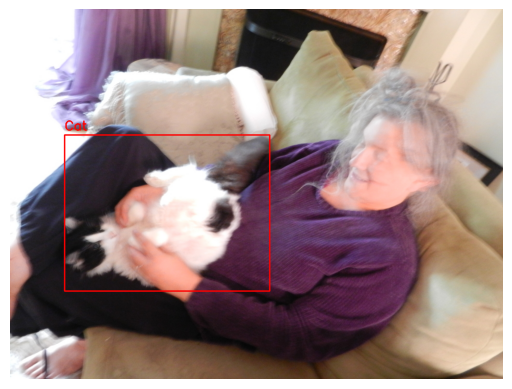

In [20]:
# Visualize image and ground truth bounding box
image_and_bboxes_view(rand_image, image_bbox_coordinates)

## Picking optimal image size
Creating function for picking the optimal image size for training model.

In [21]:
def visualise_images_size(target_dir):
    """
    Visualising all images shape for picking optimal image size for training;
    :param target_dir: is dir which from will be downloaded images;
    :return: plot with all images shape.
    """
    images_id = os.listdir(target_dir)
    width = 14
    height = 14

    images_meta_data = {"ImageShape": [],
                           "Width": [],
                           "Height": []}

    for i in range(len(images_id)):
        image = cv2.imread(target_dir + "\\" + images_id[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_shape = image.shape
        images_meta_data["ImageShape"].append(image_shape)
        images_meta_data["Width"].append(image_shape[0])
        images_meta_data["Height"].append(image_shape[1])

    images_meta_data_df = pd.DataFrame(images_meta_data)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    points = ax.scatter(images_meta_data_df.Width, images_meta_data_df.Height, color="Green", alpha=0.5, picker=True)
    ax.set_title("Image Resolution")
    ax.set_xlabel("Width", size=width)
    ax.set_xlabel("Height", size=height)
    plt.show()

In [22]:
%matplotlib notebook
# Visualising images size
visualise_images_size("dataset\\train\\")

<IPython.core.display.Javascript object>

## Optimal image size
Considering that the size of the images mostly has a value in the range *of 650 to 1024*,
therefore it can be assumed that the image size of *640x640* pixels will be optimal for training the model.
But in my case, I choose the small image size *(160x160)* because my GPU can't process the large image size.